In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 60 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 30
symbols = ['^W5000', '^IXIC']
tickers = {'^W5000': 'wilshire',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv',
         '^W5000': '../data/wilshire1990.csv'}

ITERS: 60





WILSHIRE


--------------------------------------------------
Beginning 4-param model...
--------------------------------------------------
Using start date: 1992-04-07
Successfully loaded params from ../data/pct_params/wilshire_3yr_4param.json
{   'params': {   'amounts': [   0.4306299152994913,
                                 0.49123229563254844,
                                 -0.3068003957372727,
                                 -0.08757264854335045],
                  'qs': [   -0.99,
                            0.6059402513808685,
                            -0.14565680010009133,
                            0.5618228334487975]},
    'sd': 0.727606504726827,
    'window': 379}
 1: Final value: $23480.06 (window = 379; sd = 0.728)
 4: Final value: $44927.40 (window = 402; sd = 0.706)
New best model!
{   'amounts': [0.99, 0.2650716621064467, -0.99, -0.99],
    'qs': [-0.99, 0.99, -0.99, 0.99]}
37: Final value: $49369.30 (window = 166; sd = 0.742))
New best model!
{   'amounts':

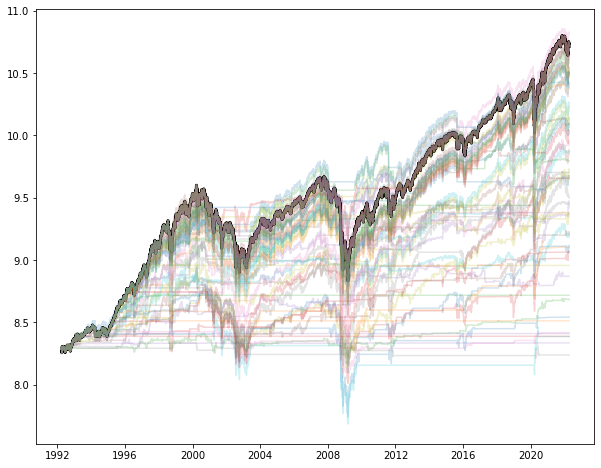

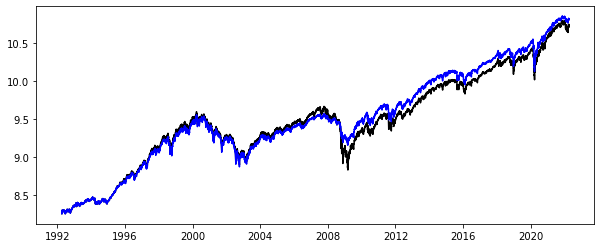

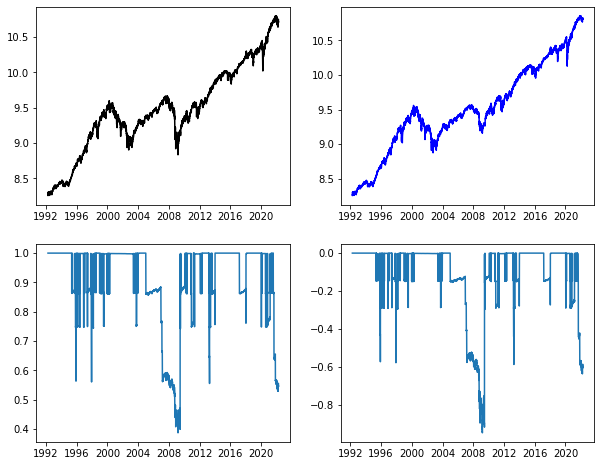



--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1992-04-07
Successfully loaded params from ../data/pct_params/wilshire_3yr_3param.json
{   'params': {   'amounts': [   0.49358591679823566,
                                 0.10153947472955996,
                                 -0.6386124005482411],
                  'qs': [   0.14817624068788757,
                            0.1978178885953702,
                            0.03810979901092298]},
    'sd': 0.17849158966645098,
    'window': 20}
 1: Final value: $36064.13 (window = 20; sd = 0.178)
 8: Final value: $37095.95 (window = 20; sd = 0.166))
New best model!
{   'amounts': [-0.99, 0.8784262499924916, 0.20872282705641004],
    'qs': [0.99, -0.24831532080116986, 0.5129007808256687]}
 9: Final value: $40929.49 (window = 20; sd = 0.250)
New best model!
{   'amounts': [-0.99, 0.99, 0.6276383736590947],
    'qs': [0.99, -0.41854744666015453

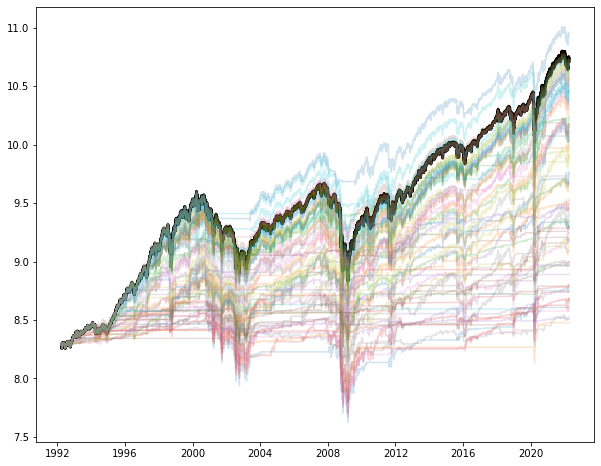

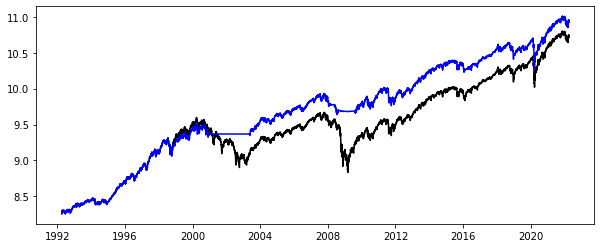

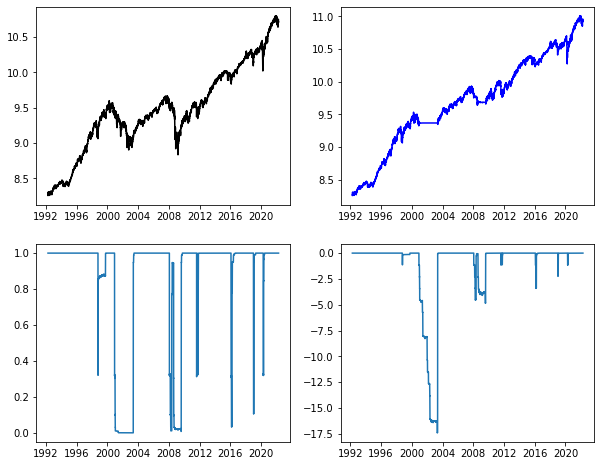



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1992-04-07
Successfully loaded params from ../data/pct_params/wilshire_3yr_2param.json
{   'params': {   'amounts': [0.6425476879197604, -0.5435800314016269],
                  'qs': [-0.1726655572447125, -0.99]},
    'sd': 0.5716645258730124,
    'window': 113}
 1: Final value: $44927.40 (window = 113; sd = 0.572)
48: Final value: $58085.32 (window = 194; sd = 0.356))
New best model!
{   'amounts': [0.7773928833476451, -0.20626962462812182],
    'qs': [-0.582235171062489, 0.06270376941129041]}
60: Final value: $42678.40 (window = 743; sd = 0.479)
% in now: 0.8018615359925491
Actions taken: 211
Wrote params to ../data/pct_params/wilshire_3yr_2param.json


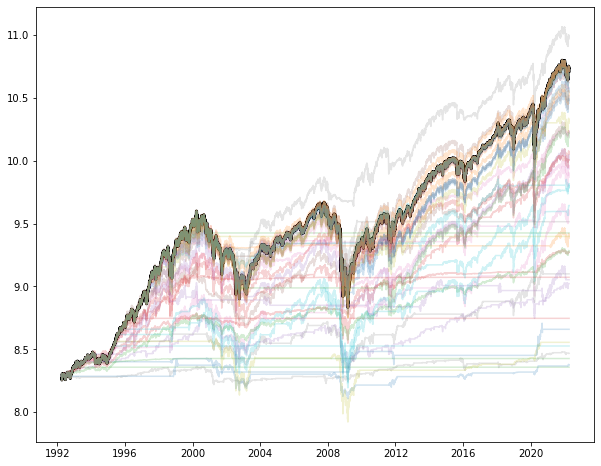

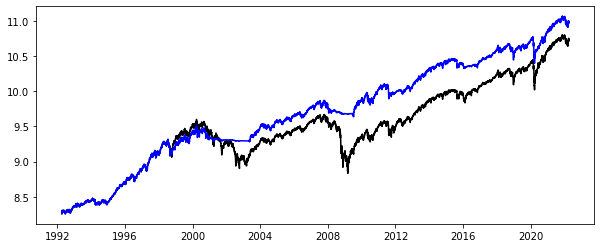

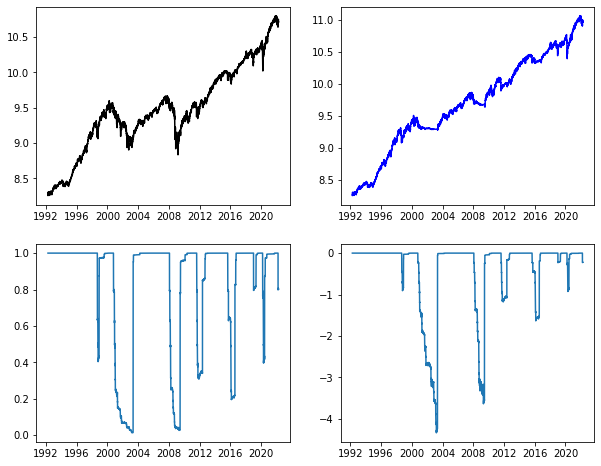




NASDAQ


--------------------------------------------------
Beginning 4-param model...
--------------------------------------------------
Using start date: 1992-04-07
Successfully loaded params from ../data/pct_params/nasdaq_3yr_4param.json
{   'params': {   'amounts': [   0.99,
                                 -0.10030061583944816,
                                 -0.99,
                                 0.014751417282225843],
                  'qs': [   0.27693570918460525,
                            -0.99,
                            0.08793159391773603,
                            -0.6321762272674555]},
    'sd': 0.2710463547856185,
    'window': 365}
 1: Final value: $27428.73 (window = 365; sd = 0.271)
60: Final value: $13054.86 (window = 931; sd = 0.150))
% in now: 1.0
Actions taken: 218
Wrote params to ../data/pct_params/nasdaq_3yr_4param.json


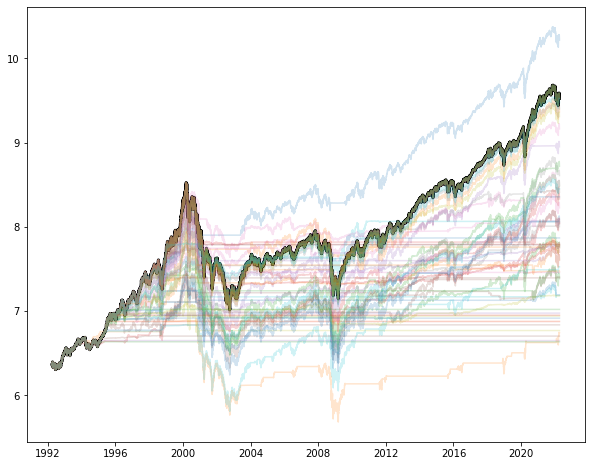

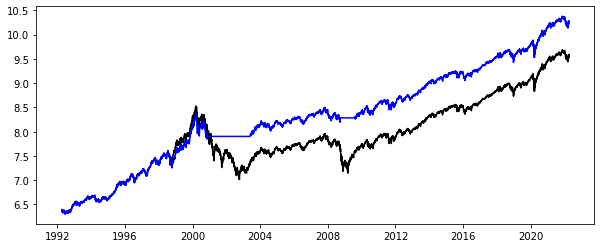

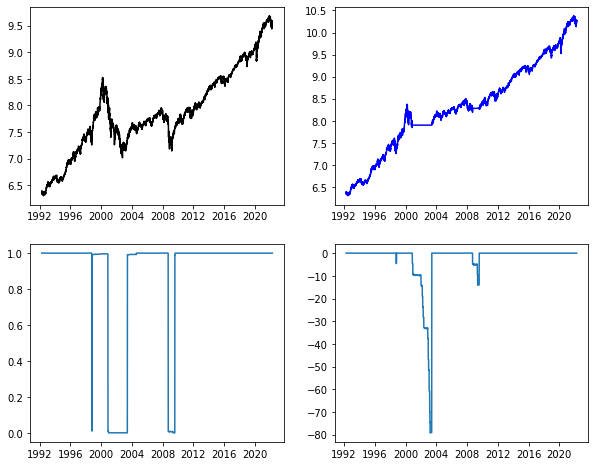



--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1992-04-07
Successfully loaded params from ../data/pct_params/nasdaq_3yr_3param.json
{   'params': {   'amounts': [   0.18184070693261703,
                                 -0.0961782173202748,
                                 -0.9633228592082537],
                  'qs': [0.7651315906687699, -0.99, 0.99]},
    'sd': 0.07582551303125414,
    'window': 98}
 1: Final value: $13711.00 (window = 98; sd = 0.076)
22: Final value: $18165.46 (window = 43; sd = 0.061))
New best model!
{   'amounts': [0.99, -0.6871657931105724, 0.5236142880438224],
    'qs': [0.4780632670159505, -0.5783346380949294, 0.9250125534542354]}
48: Final value: $18549.38 (window = 190; sd = 0.072)
New best model!
{   'amounts': [0.7194821151684115, -0.6425313499276286, 0.800087860977071],
    'qs': [0.25317319255607945, -0.02908614137352679, 0.7485747809541817]}
49: Final va

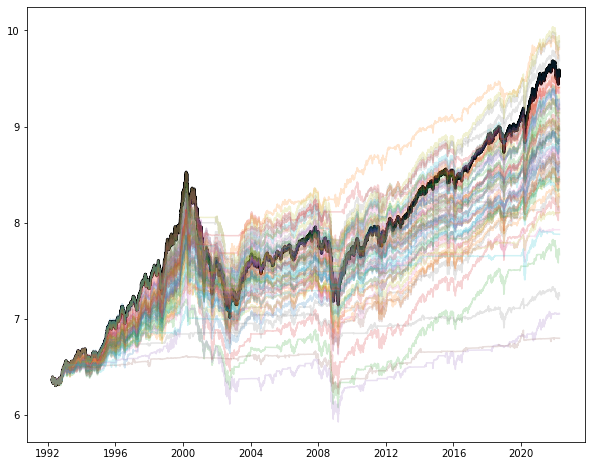

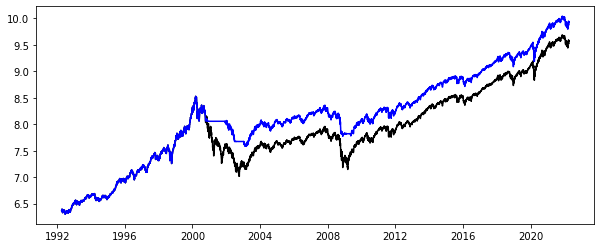

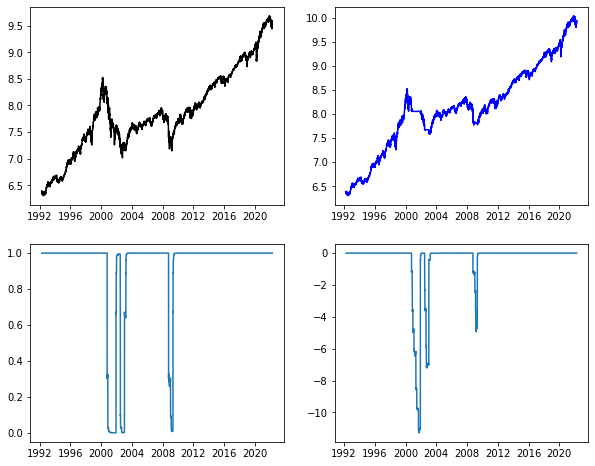



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1992-04-07
Successfully loaded params from ../data/pct_params/nasdaq_3yr_2param.json
{   'params': {   'amounts': [0.99, -0.99],
                  'qs': [0.394619215614919, -0.15180639969555876]},
    'sd': 0.40619807377615363,
    'window': 20}
 1: Final value: $ 8626.49 (window = 20; sd = 0.406)
 2: Final value: $12568.68 (window = 20; sd = 0.402)
New best model!
{   'amounts': [-0.14271705660015366, 0.17483720740816922],
    'qs': [0.99, -0.5624315471929028]}
19: Final value: $13654.84 (window = 20; sd = 0.514))
New best model!
{'amounts': [-0.5461581250046983, 0.99], 'qs': [0.99, 0.99]}
22: Final value: $13711.00 (window = 131; sd = 0.755)
New best model!
{   'amounts': [-0.6796013762320137, 0.7127642333165536],
    'qs': [0.99, 0.8145478928045705]}
32: Final value: $15780.30 (window = 100; sd = 0.935)
New best model!
{   'amounts': [-

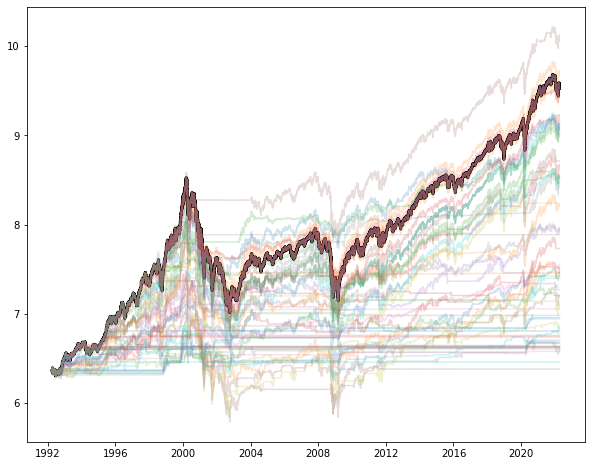

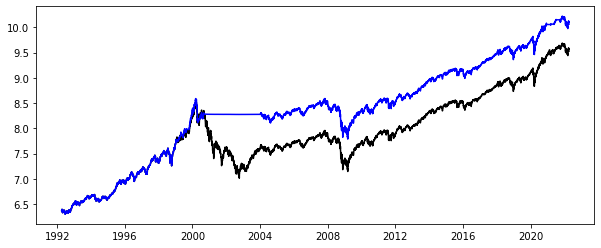

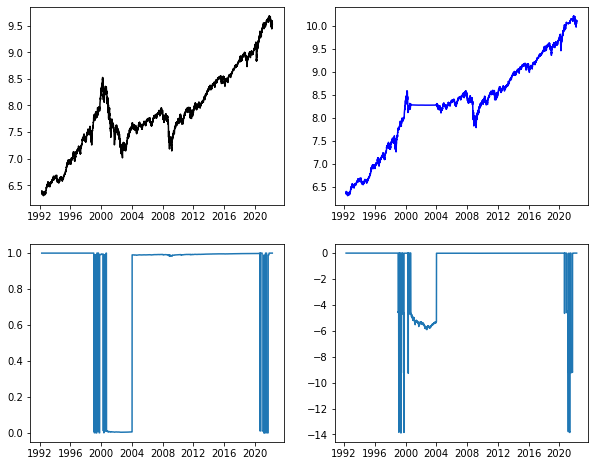

In [6]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = {'pct_in': [], 'multiplier': []}
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [4, 3, 2]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_3yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker]['pct_in'].append(plot_results(best_data))
        mod_returns = (
            best_data.Total.tolist()[-1] / best_data.Total.tolist()[1])
        market_returns = (
            best_data.Value.tolist()[-1] / best_data.Value.tolist()[1])
        multiplier = mod_returns / market_returns
        percent_in[ticker]['multiplier'].append(multiplier)
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()

In [7]:
for idx, data in percent_in.items():
    for i, pct in enumerate(data['multiplier']):
        if pct <= 1:
            data['pct_in'][i] = 1
            data['multiplier'][i] = 0
for idx, data in percent_in.items():
    print(idx)
    for k, v in data.items():
        print(f'  {k:10s}:', end=' ')
        for amt in v:
            print(f'{amt:.4f}', end=' ')
        print()
    print()  

wilshire
  pct_in    : 0.5462 1.0000 0.8019 
  multiplier: 1.0989 1.2322 1.2929 

nasdaq
  pct_in    : 1.0000 1.0000 1.0000 
  multiplier: 2.0005 1.4263 1.7058 



In [8]:
!say 30 year done